# Decision Tree Classifiers
<span style="font-size: 24px;">*And some basic concepts for training Classifiers in SKL*</span>

This Jupyter Notebook includes code that uses the Seattle Weather database from 2012 to 2015 to train a simple Decision Tree Classifier. While we progress through the code, we'll discuss some of the factors that go into using the SciKit Learn library, how to split your data into usable sets, some points about feature engineering and more.

## Database Setup
First, we use Pandas to import our database. We'll also make use of Matplotlib to visualize some of our data.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
wine = pd.read_csv("winequalityN.csv")
wine

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


Note that the Seattle Weather database is relatively small, with just a few features that will be usable for training our model. Although it is possible to use date data to give our model further information about things like seasonality, we are going to disregard that feature... for now. Can you think of a way to use it as part of your input features?

In [6]:
wine["weather"].value_counts()

weather
rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: count, dtype: int64

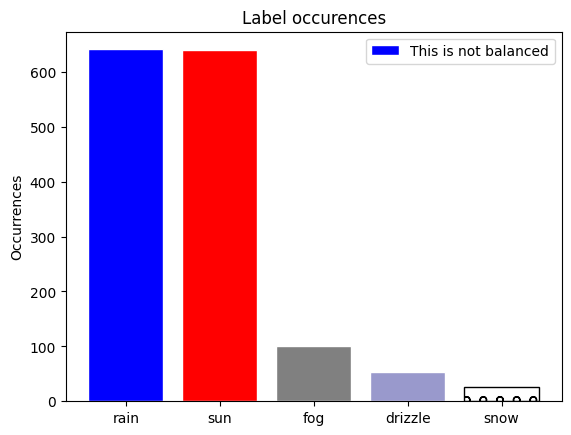

In [7]:
plt.bar(wine["weather"].value_counts().index, wine["weather"].value_counts()[:],
        color=["blue","red","grey",[0.6,0.6,0.8],"white"],
        hatch=["","","","","o"],
        edgecolor=["white","white","white","white","black"]
        
        
       )
plt.ylabel("Occurrences")
plt.title("Label occurences")
plt.legend(["This is not balanced"])

There are multiple ways we can try to deal with data balance. We'll be using SKL's built-in methods this session, but we will eventually also create our own methods.

## Data Preparation
Here, you should be ensuring your data is usable with your model: For decision trees, we need very little other than what we already have. However, for **any** model we should create  a train/test/val split. This allows us to test our model with some certainty that it will work in real-world scenarios.

For this particular example, we will only be using a *training* and *testing* split, since we will be performing no hyperparameter adjustments (or rather, some with the purpose of illustration rather than as techniques). Once we delve deeper into hyperparameter tuning, we will *have* to use a validation set.

It is usual to name our inputs 'X' and our outputs 'y'. This is because 'X' tends to be a vector of multiple features, and 'y' tends to be a single feature (capitals in this case means multi-dimensionality). We also use this remind us of the mathematics of the model: 'X' features are independent, and 'y' features depend on 'X'.

In [8]:
X = wine[["precipitation","temp_max","temp_min","wind"]]
y = wine["weather"]

In [9]:
y

0       drizzle
1          rain
2          rain
3          rain
4          rain
         ...   
1456       rain
1457       rain
1458        fog
1459        sun
1460        sun
Name: weather, Length: 1461, dtype: object

There are many ways of splitting our dataset up, but perhaps the best is the use of a random portion of our data. This helps ensure the model does not learn any ordering. 

This will be our first time using SciKit Learn! To import is, we use 'from sklearn.module import function', depending on what we need. It isn't advisable to import the whole of SciKit Learn: Some modules may not initialize properly.

In [10]:
from sklearn.model_selection import train_test_split

For training/test splits, it is common to use 80/20, although this is yet another hyperparameter that can be adjusted. For very large datasets, 90/10 splits can be okay, while for much smaller ones 20% for testing may not be enough. The key is to have **enough data to be statistically confident that our test results are trustworthy**.

In [11]:
X_train,  X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Decision Trees
Decision Trees are a simple method of classification where we divide our data in binary 'branches' until we arrive at a clean-cut category. Through the use of entropy, we can choose variables which can divide as much of our dataset as possible during each step.

DTs are simple, easy to use, and quite powerful for problems that are cleanly divisible. However, they are very prone to overfitting, and have many hyperparameters to adjust.

In [12]:
from sklearn import tree

Adjusting the max depth is paramount! Leaving it uncapped will most always lead to poor results... for now, let's test a shallow one, to better visualize it.

In [13]:
decision_tree = tree.DecisionTreeClassifier(
    criterion = "entropy",
    splitter = "best",
    max_depth = 2,
    max_features = None,
    random_state = 42,
    class_weight = None,
)

In SKL, models, once declared, are objects that have multiple built-in functions that allow for training, predicting, scoring, amongst many others. Many of them are model-specific! There are some things in common, though:
- .fit will **train** your model to a specific input and output (or just input in the case of clustering models)
- .predict will generate **predictions** from your model based on an input
- .score will **evaluate** your model based on accuracy

In [14]:
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42)

We can visualize our trees easily with the .plot_tree command from the 'tree' module. Here, we will see the decision rule, the amount of entropy or gini coefficient of each node, the amount of samples that are being split, the proportion of samples being considered and the class that will be assigned if the current node is the terminal node.

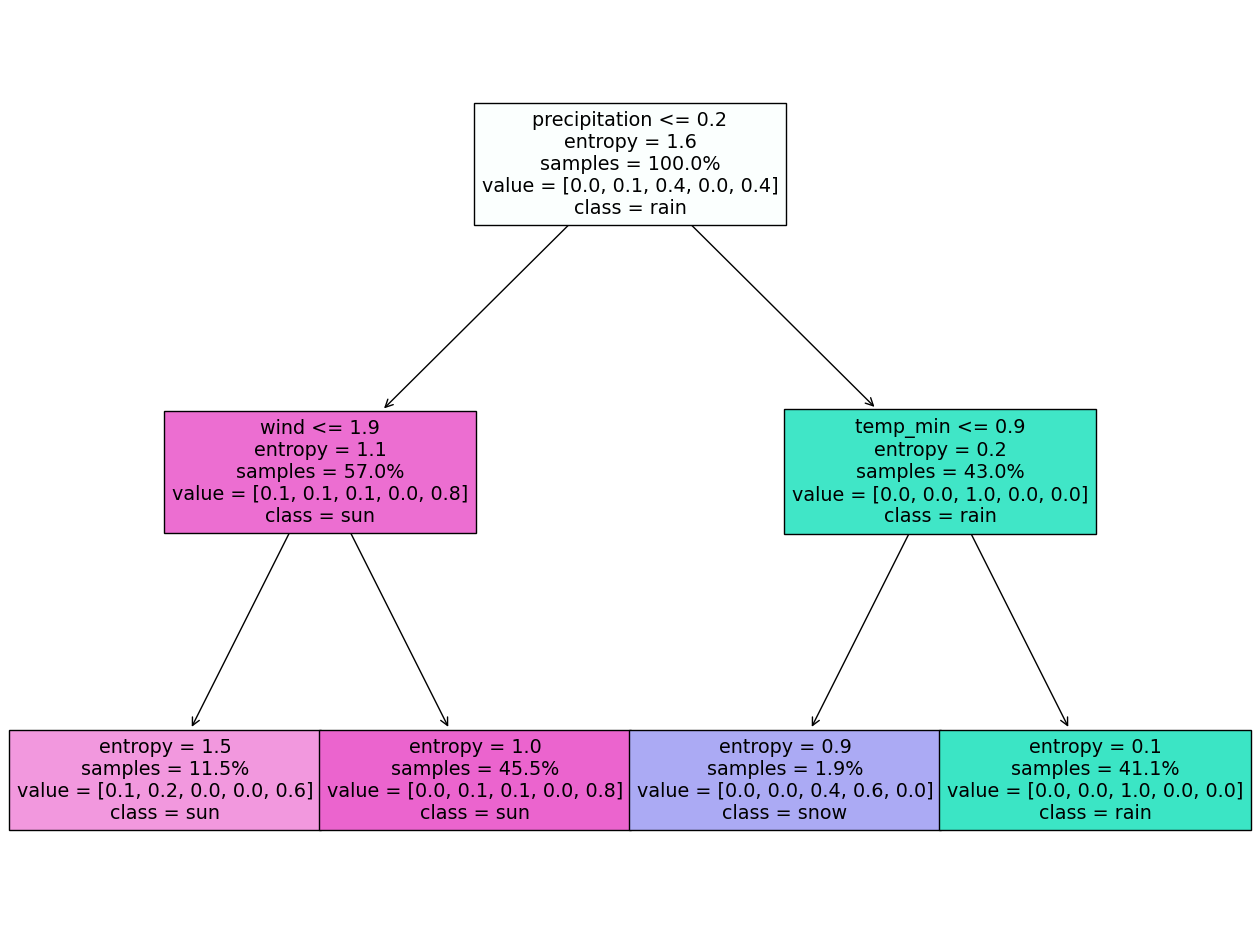

In [15]:
plt.figure(figsize=(16,12))
tree.plot_tree(decision_tree, 
               precision=1, 
               feature_names=["precipitation","temp_max","temp_min","wind"], 
               class_names=["drizzle","fog","rain","snow","sun"],
               label="all",
               filled=True,
               proportion=True,
              )
plt.savefig("dt.svg")
plt.show()


How did this do? Well, we can see our accuracy using the .score(x,y) method! And look! With an 85% accuracy for training and an 83% for testing, we did great!

...

right?

In [16]:
decision_tree.score(X_train, y_train)

0.8553082191780822

In [17]:
decision_tree.score(X_test, y_test)

0.8327645051194539

### Unbalanced Data and the Confusion Matrix
So, as you may imagine, there are some *strange* things about the tree above. For one, there are *two classes missing*! Where is 'fog' and 'drizzle'?! These, being the minority, were simply ignored by the Decision Tree: **No results will ever produce drizzle or fog**.

This is caused by data imbalance: For snow, the rule is easy enough to learn that the method caught it, but for the other two it was not worth the effort. Luckily for us, there is a way we can observe how well our model truly did.

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [19]:
y_test.value_counts()

weather
sun        131
rain       120
fog         25
drizzle      9
snow         8
Name: count, dtype: int64

In SKL, we can use any metric through the syntax of:
- metric = sklearn.metrics.metric(y_test, y_pred)

This will compare our predictions (y_pred) with our real values (y_test) and produce something we can use to evaluate the model. Here, we use the confusion matrix.

A confusion matrix shows us the TRUE values (y) vs the PREDICTED values (x). If a value is correct, then the number on the diagonal will go up (since this means the predicted value matches the true value). Otherwise, it will tell use what was predicted wrongly. We can make use of a heatmap to easily visualize it.

Text(58.222222222222214, 0.5, 'Labels')

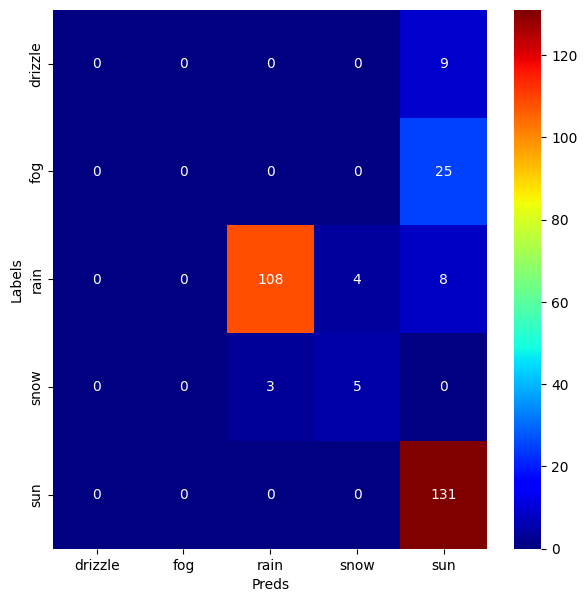

In [20]:
y_pred = decision_tree.predict(X_test)
cnfs = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7,7))
sns.heatmap(cnfs,
            annot=True,
            cmap="jet",
            vmin=0,
            fmt='g',
           )
plt.xlabel("Preds")
plt.xticks(ticks=[0.5,1.5,2.5,3.5,4.5], labels=["drizzle","fog","rain","snow","sun"])
plt.yticks(ticks=[0.5,1.5,2.5,3.5,4.5], labels=["drizzle","fog","rain","snow","sun"])
plt.ylabel("Labels")

We should set everything on the same scale, otherwise our visualization isn't very good. This extra step is sponsored by data imbalance (hooray!)

In [21]:
cnfs = cnfs.astype('float64')
for i in range(0,5):
    cnfs[i,:] = cnfs[i,:]/sum(cnfs[i,:]) # Note, we can also just do cnfs = confusion_matrix(y_true, y_pred, normalize=True)

In [22]:
cnfs

array([[0.        , 0.        , 0.        , 0.        , 1.        ],
       [0.        , 0.        , 0.        , 0.        , 1.        ],
       [0.        , 0.        , 0.9       , 0.03333333, 0.06666667],
       [0.        , 0.        , 0.375     , 0.625     , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 1.        ]])

Text(58.222222222222214, 0.5, 'Labels')

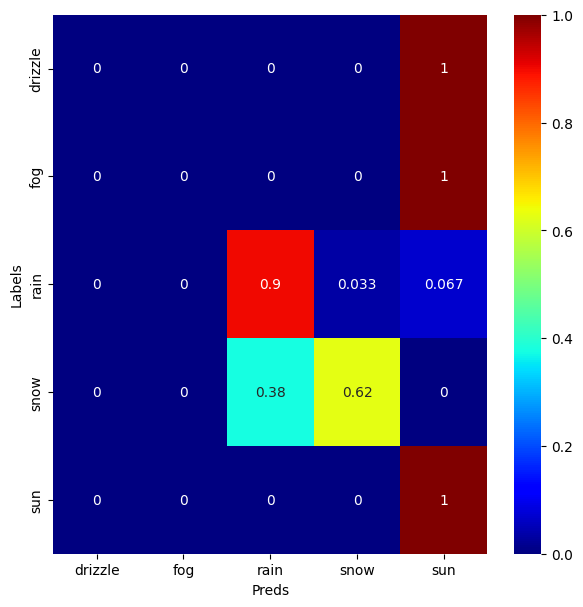

In [23]:
plt.figure(figsize=(7,7))
sns.heatmap(cnfs,
            annot=True,
            cmap="jet",
            vmin=0,
            vmax=1,
           )
plt.xlabel("Preds")
plt.xticks(ticks=[0.5,1.5,2.5,3.5,4.5], labels=["drizzle","fog","rain","snow","sun"])
plt.yticks(ticks=[0.5,1.5,2.5,3.5,4.5], labels=["drizzle","fog","rain","snow","sun"])
plt.ylabel("Labels")

Our model is **awesome** at determining whether a day will be sunny or not, and it's alright at determining whether it will snow. But... it didn't get a *singly correct prediction* about fog or drizzle. You may be asking: What if we increase the complexity of our model? Maybe having more decision nodes will help!

In [24]:
decision_tree = tree.DecisionTreeClassifier(
    criterion = "entropy",
    splitter = "best",
    max_depth = None,
    max_features = None,
    random_state = 42,
    class_weight = None,
)

decision_tree.fit(X_train, y_train)
print(decision_tree.score(X_test,y_test))


0.7440273037542662


Text(58.222222222222214, 0.5, 'Labels')

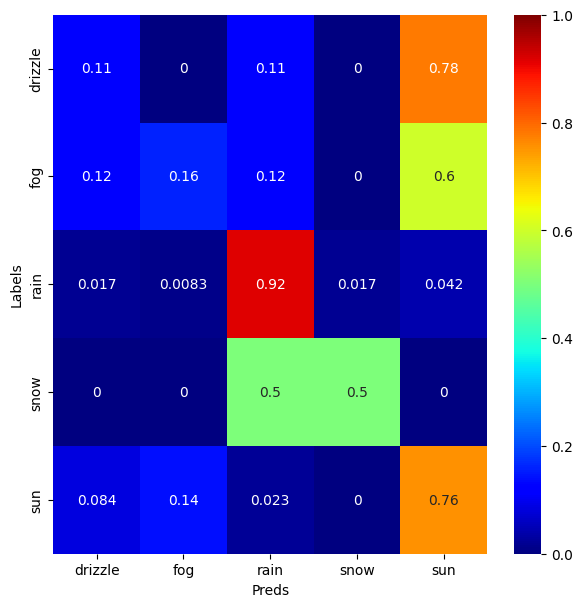

In [25]:
y_pred = decision_tree.predict(X_test)
cnfs = confusion_matrix(y_test, y_pred, normalize='true')
plt.figure(figsize=(7,7))
sns.heatmap(cnfs,
            annot=True,
            cmap="jet",
            vmin=0,
            vmax=1,
           )
plt.xlabel("Preds")
plt.xticks(ticks=[0.5,1.5,2.5,3.5,4.5], labels=["drizzle","fog","rain","snow","sun"])
plt.yticks(ticks=[0.5,1.5,2.5,3.5,4.5], labels=["drizzle","fog","rain","snow","sun"])
plt.ylabel("Labels")

Our model's test score actually went *down*, but we improved in many ways: We can now determine whether it will drizzle or by foggy sometimes! Our certainty in the sun class went down, however. It would appear our previous problem was our model was *underfitted*. Let's play around with some other parameters and see what we find!

### Decision Trees: Pruning, and Feature Importance
Preventing overfit in decision trees is quite important. Even though our previous model was underfitted, it is likely the max depth is too much, and having too many nodes will lead to poor test performance. To reduce this overfit, we can *prune* our tree.

Much like pruning a tree in real life, we *prune* a decision tree when it gets too large. There are two ways of pruning:
- Pre-pruning: We reduce the size by *limiting* how big a tree gets
- Post-pruning: We reduce the size by *removing* branches that meet some criteria.

We can do both with SKL! Let's try using a simple pre-pruning technique by setting our max depth to 4.

0.7542662116040956


Text(58.222222222222214, 0.5, 'Labels')

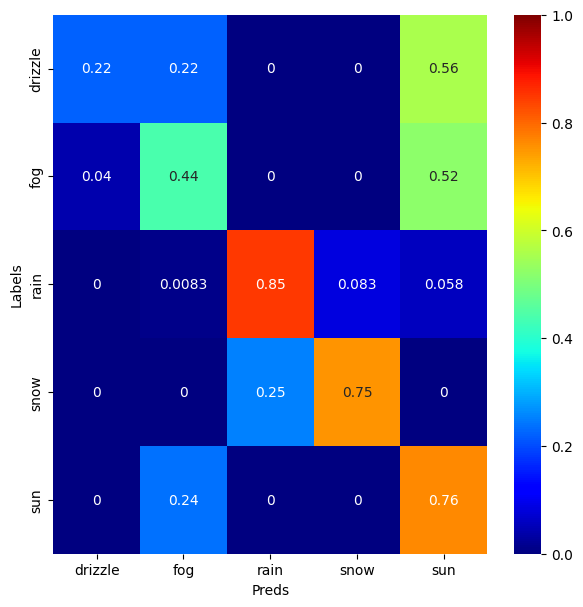

In [26]:
decision_tree = tree.DecisionTreeClassifier(
    criterion = "entropy",
    splitter = "best",
    max_depth = 4,
    max_features = None,
    random_state = 42,
    class_weight = "balanced",
)

decision_tree.fit(X_train, y_train)
print(decision_tree.score(X_test,y_test))

y_pred = decision_tree.predict(X_test)
cnfs = confusion_matrix(y_test, y_pred, normalize='true')
plt.figure(figsize=(7,7))
sns.heatmap(cnfs,
            annot=True,
            cmap="jet",
            vmin=0,
            vmax=1,
           )
plt.xlabel("Preds")
plt.xticks(ticks=[0.5,1.5,2.5,3.5,4.5], labels=["drizzle","fog","rain","snow","sun"])
plt.yticks(ticks=[0.5,1.5,2.5,3.5,4.5], labels=["drizzle","fog","rain","snow","sun"])
plt.ylabel("Labels")

We more than doubled our model's ability to predict foggy days! Let's try some post-pruning now:

0.4129692832764505


Text(58.222222222222214, 0.5, 'Labels')

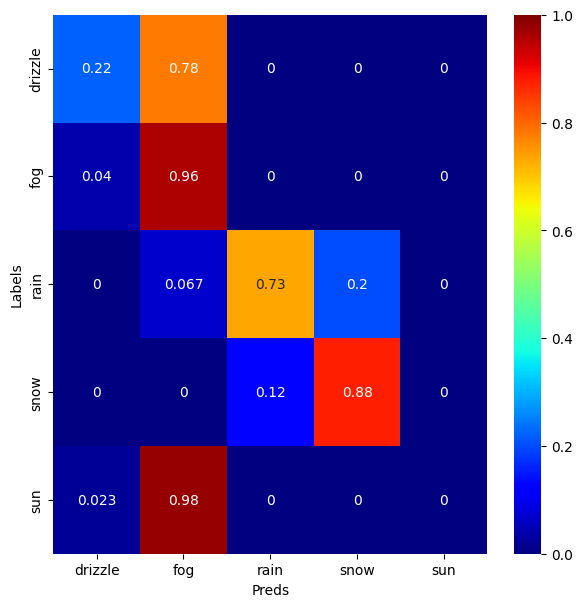

In [27]:
decision_tree = tree.DecisionTreeClassifier(
    criterion = "entropy",
    splitter = "best",
    max_depth = None,
    max_features = None,
    random_state = 42,
    class_weight = "balanced",
    ccp_alpha = 0.025,
)

decision_tree.fit(X_train, y_train)
print(decision_tree.score(X_test,y_test))

y_pred = decision_tree.predict(X_test)
cnfs = confusion_matrix(y_test, y_pred, normalize='true')
plt.figure(figsize=(7,7))
sns.heatmap(cnfs,
            annot=True,
            cmap="jet",
            vmin=0,
            vmax=1,
           )
plt.xlabel("Preds")
plt.xticks(ticks=[0.5,1.5,2.5,3.5,4.5], labels=["drizzle","fog","rain","snow","sun"])
plt.yticks(ticks=[0.5,1.5,2.5,3.5,4.5], labels=["drizzle","fog","rain","snow","sun"])
plt.ylabel("Labels")

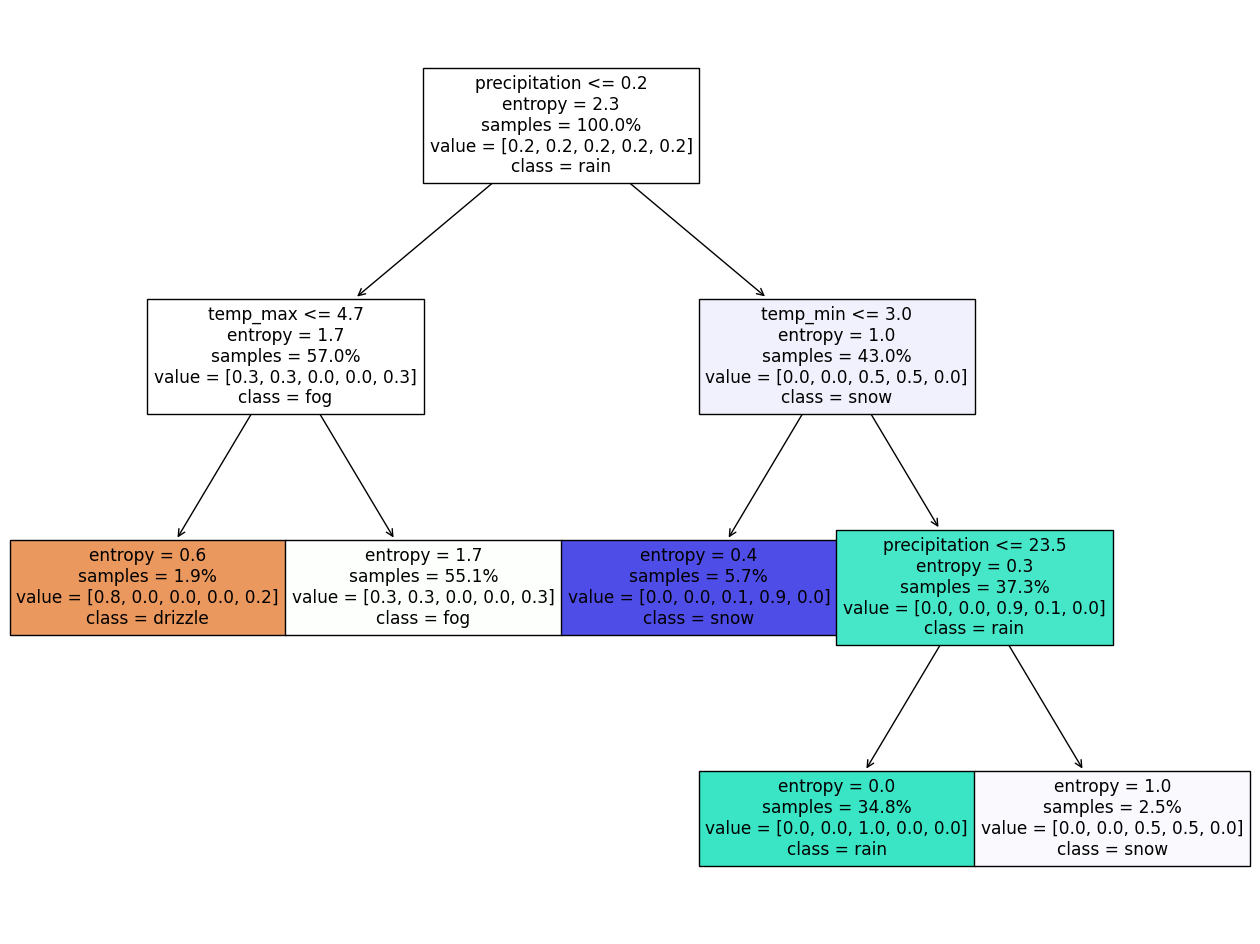

In [28]:
plt.figure(figsize=(16,12))
tree.plot_tree(decision_tree, 
               precision=1, 
               feature_names=["precipitation","temp_max","temp_min","wind"], 
               class_names=["drizzle","fog","rain","snow","sun"],
               label="all",
               filled=True,
               proportion=True,
              )
plt.show()

One of the most useful tools that Decision Trees have is that, since they use entropy to decide between values, it is possible to rank features by how often they were used to split a tree: This tells us how useful a feature is in terms of entropy for decision making.

Text(0.5, 1.0, 'Feature Importance')

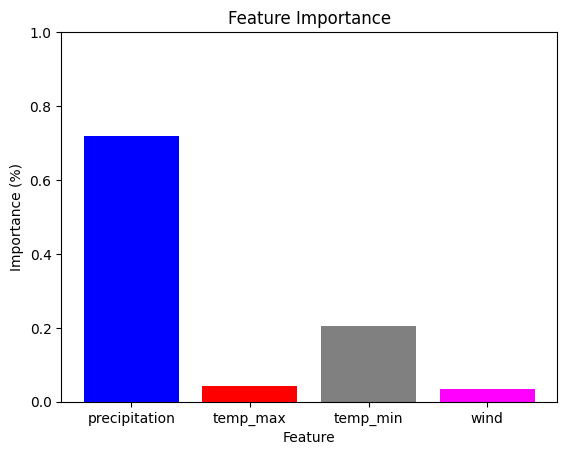

In [29]:
decision_tree = tree.DecisionTreeClassifier(
    criterion = "entropy",
    splitter = "best",
    max_depth = 4,
    max_features = None,
    random_state = 42,
    class_weight = "balanced",
)

decision_tree.fit(X_train, y_train)

plt.bar(["precipitation","temp_max", "temp_min","wind"],decision_tree.feature_importances_,
        color = ["blue","red","grey","magenta"]
       )
plt.ylim([0,1])
plt.xlabel("Feature")
plt.ylabel("Importance (%)")
plt.title("Feature Importance")

Notice how temp_max is basically never used! It just is not very useful since the same can be learned using temp_max.

0.7440273037542662


Text(58.222222222222214, 0.5, 'Labels')

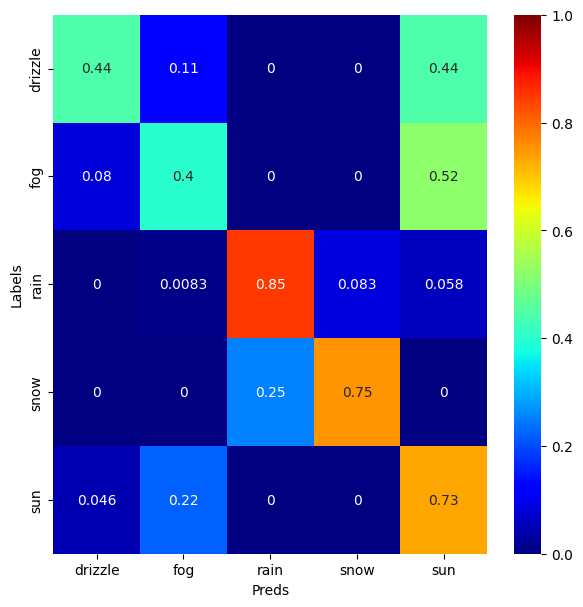

In [30]:
X = wine[["precipitation","temp_min","wind"]]
y = wine["weather"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

decision_tree = tree.DecisionTreeClassifier(
    criterion = "entropy",
    splitter = "best",
    max_depth = None,
    max_features = None,
    random_state = 42,
    class_weight = "balanced",
    ccp_alpha = 0.013
)

decision_tree.fit(X_train, y_train)
print(decision_tree.score(X_test,y_test))

y_pred = decision_tree.predict(X_test)
cnfs = confusion_matrix(y_test, y_pred, normalize='true')
plt.figure(figsize=(7,7))
sns.heatmap(cnfs,
            annot=True,
            cmap="jet",
            vmin=0,
            vmax=1,
           )
plt.xlabel("Preds")
plt.xticks(ticks=[0.5,1.5,2.5,3.5,4.5], labels=["drizzle","fog","rain","snow","sun"])
plt.yticks(ticks=[0.5,1.5,2.5,3.5,4.5], labels=["drizzle","fog","rain","snow","sun"])
plt.ylabel("Labels")

### Feature Engineering
We are allowed to add new variables to our model based on the data we have. We can actually use decision trees during training of other models to determine if the features we made have descriptive power (by observing their importance). Let's create a new feature using the date to create a month variable!

In [31]:
wine["month"] = pd.to_numeric(wine["date"].str.strip().str[5:7])

0.7474402730375427


Text(58.222222222222214, 0.5, 'Labels')

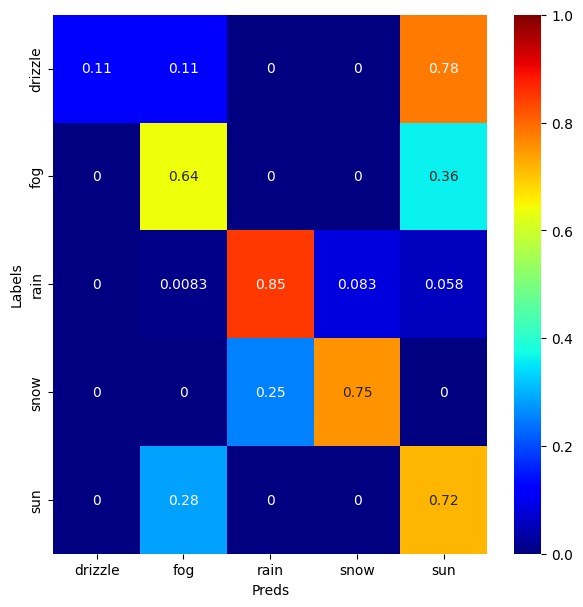

In [32]:
X = wine[["precipitation","temp_min","wind","month"]]
y = wine["weather"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

decision_tree = tree.DecisionTreeClassifier(
    criterion = "entropy",
    splitter = "best",
    max_depth = 4,
    max_features = None,
    random_state = 42,
    class_weight = "balanced",
)

decision_tree.fit(X_train, y_train)
print(decision_tree.score(X_test,y_test))

y_pred = decision_tree.predict(X_test)
cnfs = confusion_matrix(y_test, y_pred, normalize='true')
plt.figure(figsize=(7,7))
sns.heatmap(cnfs,
            annot=True,
            cmap="jet",
            vmin=0,
            vmax=1,
           )
plt.xlabel("Preds")
plt.xticks(ticks=[0.5,1.5,2.5,3.5,4.5], labels=["drizzle","fog","rain","snow","sun"])
plt.yticks(ticks=[0.5,1.5,2.5,3.5,4.5], labels=["drizzle","fog","rain","snow","sun"])
plt.ylabel("Labels")

Text(0.5, 1.0, 'Feature Importance')

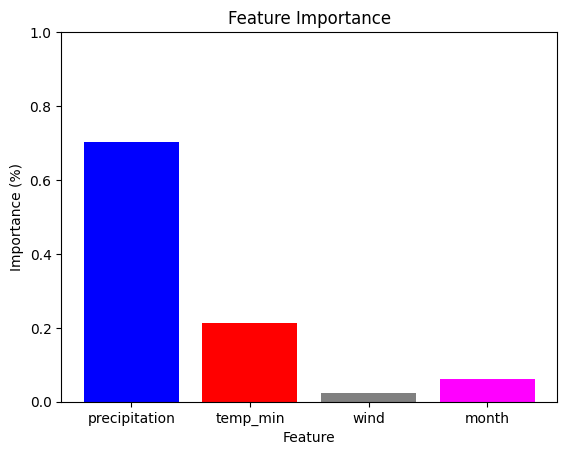

In [33]:
plt.bar(["precipitation", "temp_min","wind", "month"],decision_tree.feature_importances_,
        color = ["blue","red","grey","magenta"]
       )
plt.ylim([0,1])
plt.xlabel("Feature")
plt.ylabel("Importance (%)")
plt.title("Feature Importance")